In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-score/credit-score.csv


In [64]:
df = pd.read_csv('/kaggle/input/credit-card-score/credit-score.csv')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           100000 non-null  object 
 1   Customer_ID                  100000 non-null  object 
 2   Month                        100000 non-null  int64  
 3   Age                          100000 non-null  float64
 4   Occupation                   100000 non-null  object 
 5   Annual_Income                100000 non-null  float64
 6   Monthly_Inhand_Salary        100000 non-null  float64
 7   Num_Bank_Accounts            100000 non-null  float64
 8   Num_Credit_Card              100000 non-null  float64
 9   Interest_Rate                100000 non-null  float64
 10  Num_of_Loan                  100000 non-null  float64
 11  Type_of_Loan                 100000 non-null  object 
 12  Delay_from_due_date          100000 non-null  int64  
 13  

In [66]:
df = df.drop(columns=['ID','Customer_ID','Not_Specified'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        100000 non-null  int64  
 1   Age                          100000 non-null  float64
 2   Occupation                   100000 non-null  object 
 3   Annual_Income                100000 non-null  float64
 4   Monthly_Inhand_Salary        100000 non-null  float64
 5   Num_Bank_Accounts            100000 non-null  float64
 6   Num_Credit_Card              100000 non-null  float64
 7   Interest_Rate                100000 non-null  float64
 8   Num_of_Loan                  100000 non-null  float64
 9   Type_of_Loan                 100000 non-null  object 
 10  Delay_from_due_date          100000 non-null  int64  
 11  Num_of_Delayed_Payment       100000 non-null  float64
 12  Changed_Credit_Limit         100000 non-null  float64
 13  

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])

In [68]:
df['Type_of_Loan'] = label_encoder.fit_transform(df['Type_of_Loan'])
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [69]:
df['Occupation'].unique()

array([12, 13,  4,  5,  2,  7, 10,  3,  6,  8,  0, 11,  9, 14,  1])

In [70]:
df['Type_of_Loan'].unique().max()

6259

In [71]:
df['Payment_of_Min_Amount'].unique()

array([0, 1])

In [72]:
df['Credit_Score'] = df['Credit_Score'].map({-1:0,0:1,1:2})

In [73]:
df.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_History_Age_Formated,Auto_Loan,Credit-Builder_Loan,Personal_Loan,Home_Equity_Loan,Mortgage_Loan,Student_Loan,Debt_Consolidation_Loan,Payday_Loan,Missed_Payment_Day
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,4.500000,33.322050,6.949840,50519.155472,4198.468568,5.403396,5.533620,14.53208,3.532880,3194.687520,...,221.180115,0.305600,0.31728,0.311040,0.314000,0.313600,0.31040,0.31040,0.319440,0.982140
std,2.291299,10.773792,4.309542,38335.627421,3187.369878,2.965084,2.067078,8.74133,2.446356,1714.425404,...,99.071581,0.460663,0.46542,0.462921,0.464119,0.463958,0.46266,0.46266,0.466262,0.132443
min,1.000000,14.000000,0.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,2.750000,24.000000,3.000000,19344.270000,1626.594167,3.000000,4.000000,7.00000,2.000000,1777.750000,...,146.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
50%,4.500000,33.000000,7.000000,37002.580000,3096.378333,5.000000,5.000000,13.00000,3.000000,3463.000000,...,219.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000
75%,6.250000,42.000000,11.000000,71689.680000,5961.637500,7.000000,7.000000,20.00000,5.000000,4553.250000,...,301.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000
max,8.000000,100.000000,14.000000,277803.000000,15204.633333,100.000000,11.000000,34.00000,9.000000,6259.000000,...,404.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        100000 non-null  int64  
 1   Age                          100000 non-null  float64
 2   Occupation                   100000 non-null  int64  
 3   Annual_Income                100000 non-null  float64
 4   Monthly_Inhand_Salary        100000 non-null  float64
 5   Num_Bank_Accounts            100000 non-null  float64
 6   Num_Credit_Card              100000 non-null  float64
 7   Interest_Rate                100000 non-null  float64
 8   Num_of_Loan                  100000 non-null  float64
 9   Type_of_Loan                 100000 non-null  int64  
 10  Delay_from_due_date          100000 non-null  int64  
 11  Num_of_Delayed_Payment       100000 non-null  float64
 12  Changed_Credit_Limit         100000 non-null  float64
 13  

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [76]:
# Generate some sample data (you should replace this with your own dataset)
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [79]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [80]:
rf_pred = rf_model.predict(X_val)
xgb_pred = xgb_model.predict(X_val)
mlp_pred = mlp_model.predict(X_val)

In [81]:
new_features = np.column_stack((xgb_pred, rf_pred, mlp_pred))

In [82]:
meta_model = LogisticRegression()
meta_model.fit(new_features, y_val)

LogisticRegression()

In [83]:
rf_test_pred = rf_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_val)
mlp_test_pred = mlp_model.predict(X_val)

In [84]:
test_new_feature_set = np.column_stack((xgb_test_pred, rf_test_pred,mlp_test_pred))

In [85]:
final_predictions = meta_model.predict(test_new_feature_set)

In [86]:
accuracy = accuracy_score(y_val, final_predictions)
print(f"Accuracy of the stacking ensemble: {accuracy}")

Accuracy of the stacking ensemble: 0.83265


In [87]:
xgb_acc = accuracy_score(y_val,xgb_test_pred )
print(f"Accuracy of the stacking ensemble: {xgb_acc}")

Accuracy of the stacking ensemble: 0.7718


In [88]:
mlp_acc = accuracy_score(y_val,mlp_test_pred )
print(f"Accuracy of the stacking ensemble: {mlp_acc}")

Accuracy of the stacking ensemble: 0.6169


In [89]:
rf_acc = accuracy_score(y_val,rf_test_pred )
print(f"Accuracy of the stacking ensemble: {rf_acc}")

Accuracy of the stacking ensemble: 0.8333


xgb_acc =

In [90]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [91]:
fps =precision_score(y_val, final_predictions,average="macro")
print(f"Precision Score of the stacking ensemble: {fps}")
fps_xgb =precision_score(y_val,xgb_test_pred ,average="macro")
print(f"Precision Score of the XGB: {fps_xgb}")
fps_rf =precision_score(y_val, rf_test_pred,average="macro")
print(f"Precision Score of the RF: {fps_rf}")
fps_mlp =precision_score(y_val, mlp_test_pred,average="macro")
print(f"Precision Score of the mlp: {fps_mlp}")

Precision Score of the stacking ensemble: 0.823722457561851
Precision Score of the XGB: 0.7573749223687808
Precision Score of the RF: 0.8239795093249228
Precision Score of the mlp: 0.6201022523451704


In [92]:
recall_stacking = recall_score(y_val, final_predictions, average="macro")
print(f"Recall Score of the stacking ensemble: {recall_stacking}")

recall_xgb = recall_score(y_val, xgb_test_pred, average="macro")
print(f"Recall Score of the XGB: {recall_xgb}")

recall_rf = recall_score(y_val, rf_test_pred, average="macro")
print(f"Recall Score of the RF: {recall_rf}")

recall_mlp = recall_score(y_val, mlp_test_pred, average="macro")
print(f"Recall Score of the MLP: {recall_mlp}")

Recall Score of the stacking ensemble: 0.8284034282143495
Recall Score of the XGB: 0.76209351068281
Recall Score of the RF: 0.8302626407252722
Recall Score of the MLP: 0.5780269920672089


In [93]:
f1_stacking = f1_score(y_val, final_predictions, average="macro")
print(f"F1 Score of the stacking ensemble: {f1_stacking}")

f1_xgb = f1_score(y_val, xgb_test_pred, average="macro")
print(f"F1 Score of the XGB: {f1_xgb}")

f1_rf = f1_score(y_val, rf_test_pred, average="macro")
print(f"F1 Score of the RF: {f1_rf}")

f1_mlp = f1_score(y_val, mlp_test_pred, average="macro")
print(f"F1 Score of the MLP: {f1_mlp}")

F1 Score of the stacking ensemble: 0.8257411092694863
F1 Score of the XGB: 0.7595236206804187
F1 Score of the RF: 0.8267954852482892
F1 Score of the MLP: 0.5625873868383916


In [94]:
final_predicted_probabilities = meta_model.predict_proba(test_new_feature_set)
rf_predicted_probabilities = rf_model.predict_proba(X_val)
xgb_predicted_probabilities = xgb_model.predict_proba(X_val)
mlp_predicted_probabilities = mlp_model.predict_proba(X_val)

In [95]:
roc_auc_stacking = roc_auc_score(y_val, final_predicted_probabilities,multi_class ='ovr')
print(f"ROC AUC Score of the stacking ensemble: {roc_auc_stacking}")

roc_auc_xgb = roc_auc_score(y_val, xgb_predicted_probabilities,multi_class ='ovr')
print(f"ROC AUC Score of the XGB: {roc_auc_xgb}")

roc_auc_rf = roc_auc_score(y_val, rf_predicted_probabilities,multi_class ='ovr')
print(f"ROC AUC Score of the RF: {roc_auc_rf}")

roc_auc_mlp = roc_auc_score(y_val, mlp_predicted_probabilities,multi_class ='ovr')
print(f"ROC AUC Score of the MLP: {roc_auc_mlp}")

ROC AUC Score of the stacking ensemble: 0.8995490358211565
ROC AUC Score of the XGB: 0.9065068173597837
ROC AUC Score of the RF: 0.9382853749420343
ROC AUC Score of the MLP: 0.7779934902964084


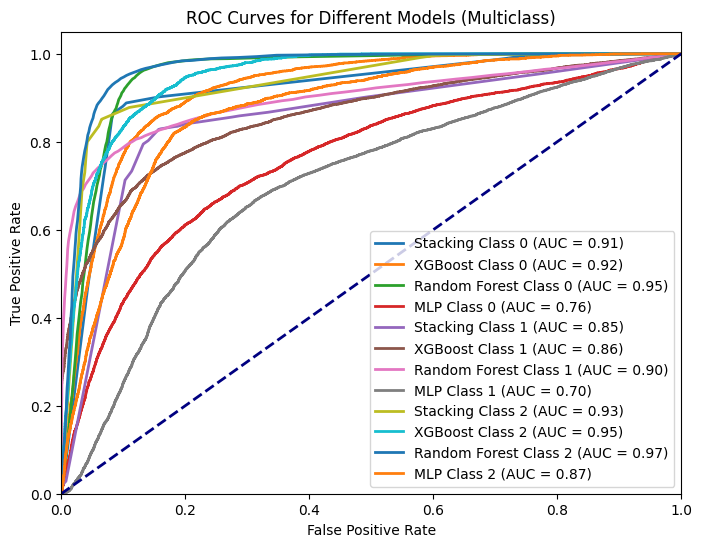

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example probability scores for the models (replace with actual scores)
stacking_probabilities = final_predicted_probabilities
xgb_probabilities = xgb_predicted_probabilities
rf_probabilities = rf_predicted_probabilities
mlp_probabilities = mlp_predicted_probabilities

# Example true labels for the validation set (y_val) and the number of classes

num_classes = len(np.unique(y_val))

# Initialize the plot
plt.figure(figsize=(8, 6))

# Calculate ROC curves and AUC for each class and plot them
for i in range(num_classes):
    fpr_stacking, tpr_stacking, _ = roc_curve(np.array(y_val) == i, stacking_probabilities[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
    
    fpr_xgb, tpr_xgb, _ = roc_curve(np.array(y_val) == i, xgb_probabilities[:, i])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
    
    fpr_rf, tpr_rf, _ = roc_curve(np.array(y_val) == i, rf_probabilities[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    fpr_mlp, tpr_mlp, _ = roc_curve(np.array(y_val) == i, mlp_probabilities[:, i])
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    
    # Plot ROC curves for each model and class
    plt.plot(fpr_stacking, tpr_stacking, lw=2, label=f'Stacking Class {i} (AUC = {roc_auc_stacking:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost Class {i} (AUC = {roc_auc_xgb:.2f})')
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest Class {i} (AUC = {roc_auc_rf:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, lw=2, label=f'MLP Class {i} (AUC = {roc_auc_mlp:.2f})')

# Add the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models (Multiclass)')
plt.legend(loc='lower right')
plt.show()

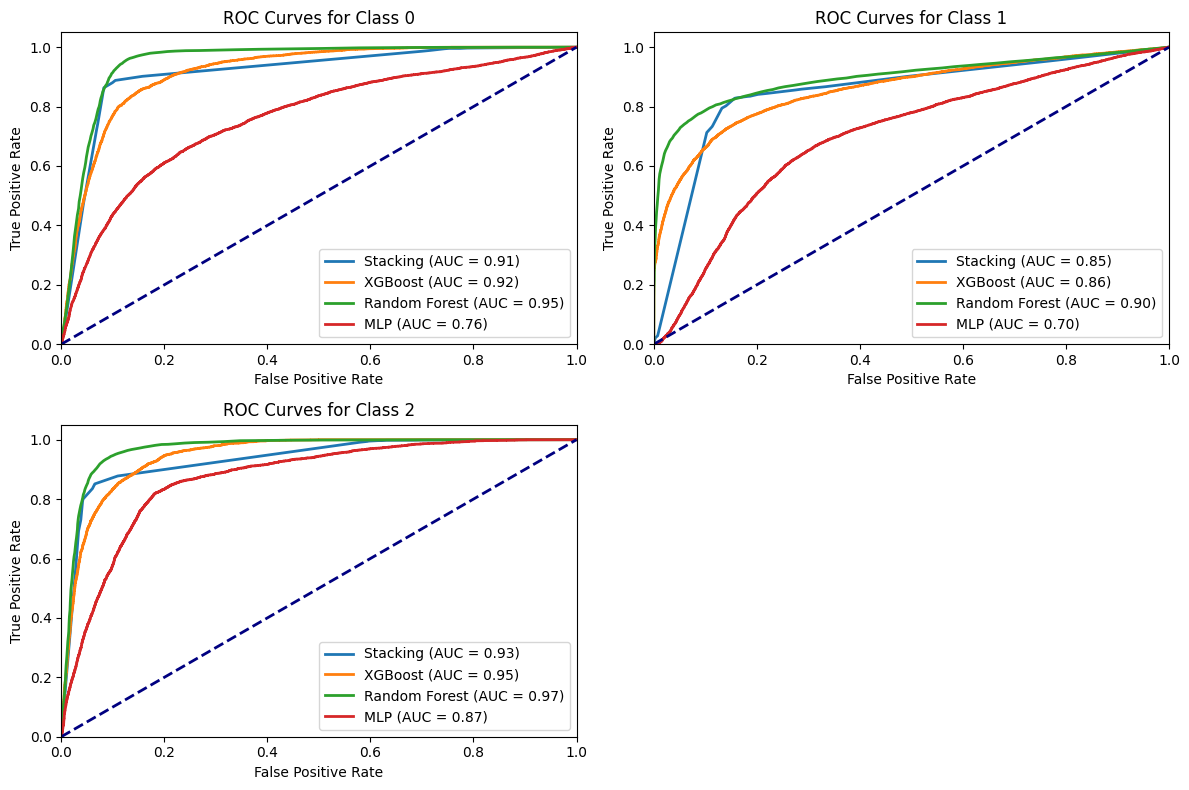

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example probability scores for the models (replace with actual scores)
stacking_probabilities = final_predicted_probabilities
xgb_probabilities = xgb_predicted_probabilities
rf_probabilities = rf_predicted_probabilities
mlp_probabilities = mlp_predicted_probabilities

# Example true labels for the validation set (y_val) and the number of classes
num_classes = len(np.unique(y_val))

# Create a separate ROC curve and plot for each class
plt.figure(figsize=(12, 8))

for i in range(num_classes):
    plt.subplot(2, 2, i + 1)

    fpr_stacking, tpr_stacking, _ = roc_curve(np.array(y_val) == i, stacking_probabilities[:, i])
    roc_auc_stacking = auc(fpr_stacking, tpr_stacking)
    
    fpr_xgb, tpr_xgb, _ = roc_curve(np.array(y_val) == i, xgb_probabilities[:, i])
    roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
    
    fpr_rf, tpr_rf, _ = roc_curve(np.array(y_val) == i, rf_probabilities[:, i])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    fpr_mlp, tpr_mlp, _ = roc_curve(np.array(y_val) == i, mlp_probabilities[:, i])
    roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
    
    plt.plot(fpr_stacking, tpr_stacking, lw=2, label=f'Stacking (AUC = {roc_auc_stacking:.2f})')
    plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
    plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, lw=2, label=f'MLP (AUC = {roc_auc_mlp:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for Class {i}')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


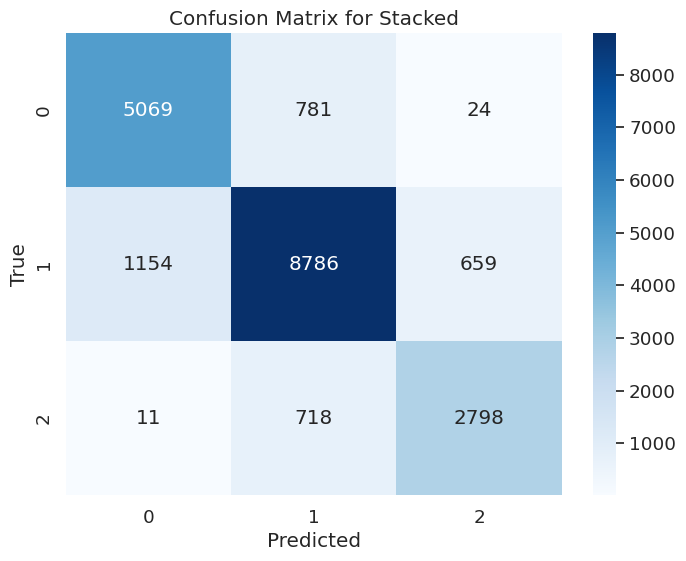

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Example true labels for the validation set (y_val) and predicted labels (replace with actual data)
y_true = y_val  # True labels
y_pred = final_predictions  # Predicted labels from your model

# Get the class names
class_names = [0,1,2]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Create a beautiful heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Stacked')
plt.show()


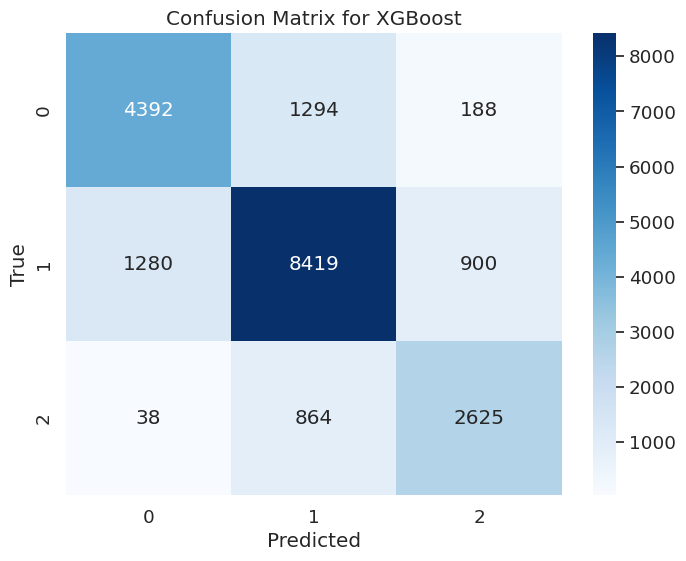

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Example true labels for the validation set (y_val) and predicted labels (replace with actual data)
y_true = y_val  # True labels
y_pred =  xgb_test_pred # Predicted labels from your model

# Get the class names
class_names = [0,1,2]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Create a beautiful heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()


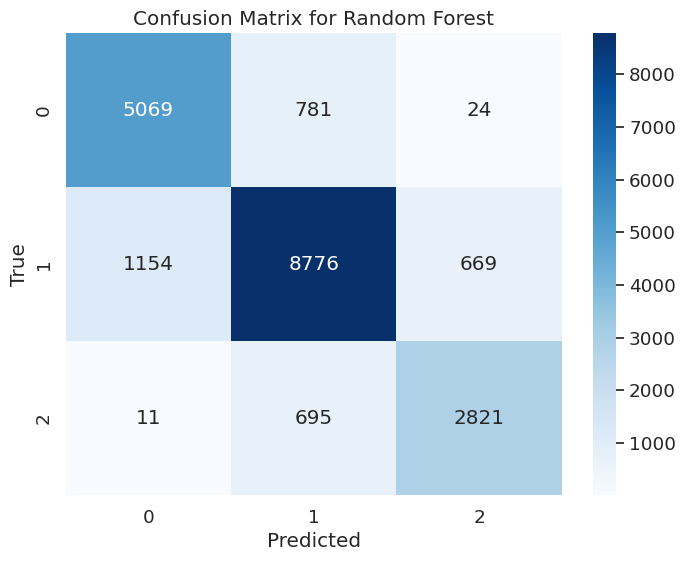

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Example true labels for the validation set (y_val) and predicted labels (replace with actual data)
y_true = y_val  # True labels
y_pred =  rf_test_pred # Predicted labels from your model

# Get the class names
class_names = [0,1,2]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Create a beautiful heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()


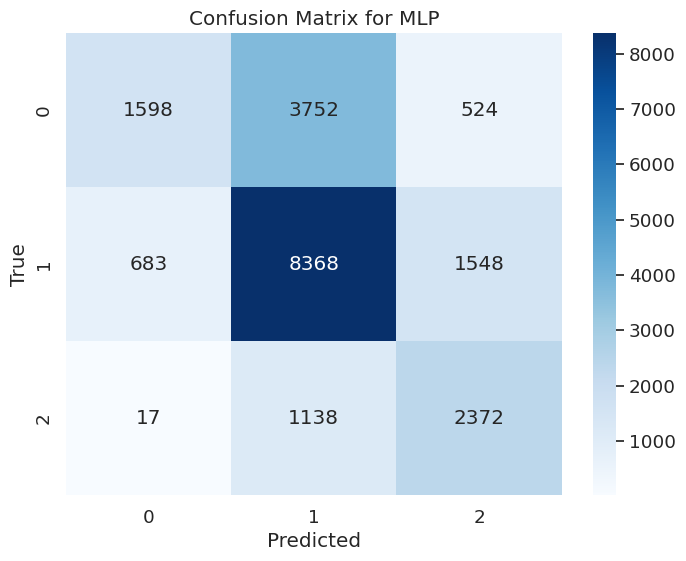

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Example true labels for the validation set (y_val) and predicted labels (replace with actual data)
y_true = y_val  # True labels
y_pred =  mlp_test_pred # Predicted labels from your model

# Get the class names
class_names = [0,1,2]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=class_names)

# Create a beautiful heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP')
plt.show()
